In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
%matplotlib inline

In [9]:
df = Table.read('/disk1/hrb/python/data/surveys/ztf/qsos/meta_data/ztf_meta.txt', format = 'ipac')
df = df.to_pandas()

[None]

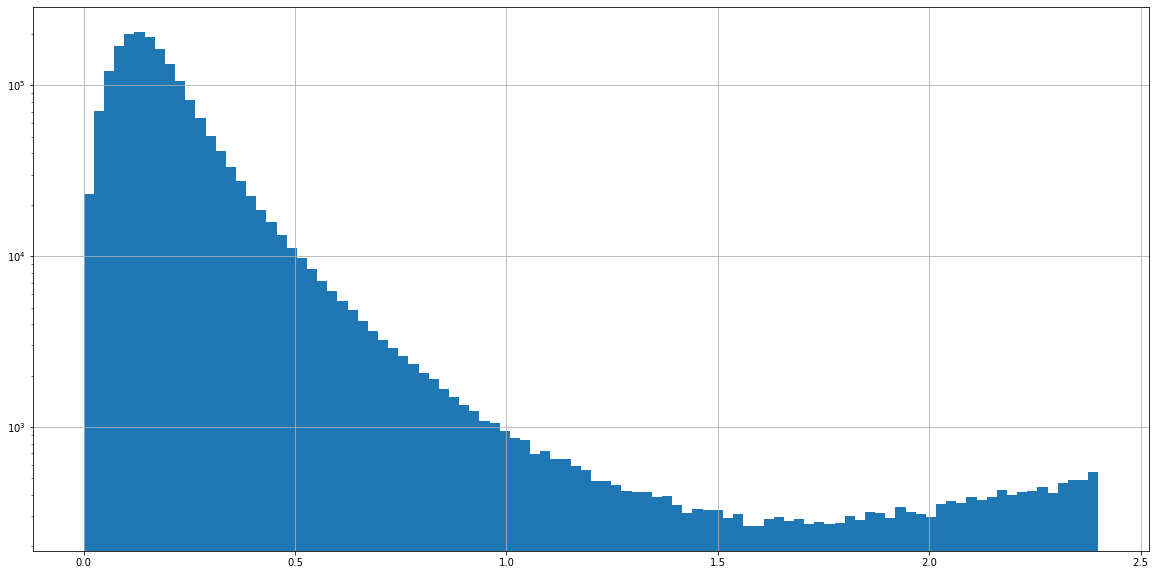

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df['dist_x'].hist(bins=100, ax=ax)
ax.set(yscale='log')

In [10]:
df['uid_01'].value_counts().head(10)

329450    15
32388     15
32563     15
32779     14
32769     14
351439    14
32557     14
444881    14
235289    14
11832     14
Name: uid_01, dtype: int64

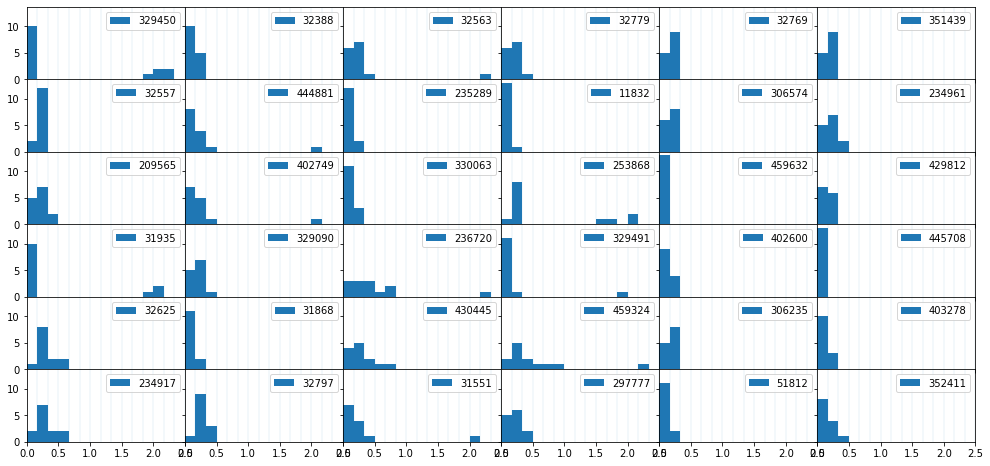

In [12]:
#find the most common uid
n=6
skip = 1
fig, axes = plt.subplots(n,n, figsize = (17,8), sharex = True, sharey = True);
#Maybe better to group by then hist rather than continually slicing df
uids = df['uid_01'].value_counts().head(skip*n**2).index[::skip]
for ax,uid in zip(axes.ravel(),uids):
    displacements = df[df['uid_01'] == uid]['dist_x'].sort_values().values
    
    #Grid bin edges on plot
    counts, bins, _ = ax.hist(displacements, bins = 15, range = (0,2.5), label = str(uid));
    for binedge in bins:
        ax.axvline(x = binedge, lw = 0.1)
        
#     #plot rayleigh distribution
#     sigma = (2/np.pi)**0.5*np.exp(-0.5)/np.max(counts[:len(counts)//2])
#     ax.plot(x,rayleigh(x0,sigma), lw = 0.5, color = 'k')
        
#     #Plot Hartigan Dip-Test intervals
#     intervals = UniDip(displacements).run()
#     for interval, color in zip(intervals,'gr'):
#         lower = displacements[interval[0]]
#         upper = displacements[interval[1]]
#         ax.axvline(x = lower, lw = 1, color = 'r')
#         ax.axvline(x = upper, lw = 1, color = 'r')
#         ax.fill_betweenx([0,30],lower,upper, facecolor = color, alpha = 0.5)
    
    ax.set(xlim = [0,2.5]);
    ax.legend(loc = 1)
    
plt.subplots_adjust(wspace = 0, hspace = 0)